In [2]:
#Import library yang dibutuhkan 
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import time 
import itertools

#Baca dataset dari file
datasetPath = "corrected_dataku.txt"
dataset = np.loadtxt(datasetPath, delimiter=" ")

#Mendefinisikan parameter K-Means Klastering
k = 2  #Jumlah klaster yang diinginkan
iterationCounter = 0 #Counter untuk iterasi
input = dataset #Input data

#Fungsi untuk inisialisasi titik pusat klaster (random)
def initCentroid(dataIn, k):
    result = dataIn[np.random.choice(dataIn.shape[0], k, replace=False)]
    return result

In [3]:
#Fungsi untuk plot hasil klaster per iterasi
def plotClusterResult(listClusterMembers, centroid, iteration, converged):
    n = listClusterMembers.__len__()
    color = iter(cm.rainbow(np.linspace(0, 1, n)))
    plt.figure("result")
    plt.clf()
    plt.title("iteration-" + iteration)
    marker = itertools.cycle(('.', '*', '^', 'x', '+'))
    for i in range(n):
        col = next(color)
        memberCluster = np.asmatrix(listClusterMembers[i])
        plt.scatter(np.ravel(memberCluster[:, 0]), np.ravel(memberCluster[:, 1]),
                    marker=marker.__next__(), s=100, c=col, label="klaster-"+str(i+1))
    for i in range(n):
        plt.scatter((centroid[i, 0]), (centroid[i, 1]), marker=marker.__next__()
                    , c=col, label="centroid-" + str(i + 1))
    if(converged == 0):
        plt.legend()
        plt.ion()
        plt.show()
        plt.pause(0.1)
    if(converged == 1):
        plt.legend()
        plt.show(block=True)

In [4]:
#Fungsi utama algoritma K-Means
def kMeans(data, centroidInit):
    nCluster = k #Banyaknya klaster
    global iterationCounter
    centroidInit = np.matrix(centroidInit)
    
    #Looping hingga konvergen
    while(True):
        iterationCounter +=1
        euclideanMatrixAllCluster = np.ndarray(shape=(data.shape[0], 0))
        
        #Ulangi proses untuk semua klaster
        for i in range(0, nCluster):
            centroidRepeated = np.repeat(centroidInit[i,:], data.shape[0], axis=0)
            deltaMatrix = abs(np.subtract(data,centroidRepeated))
            
            #Hitung jarak Euclidean
            euclideanMatrix = np.sqrt(np.square(deltaMatrix).sum(axis=1))
            euclideanMatrixAllCluster = \
                np.concatenate((euclideanMatrixAllCluster, euclideanMatrix), axis=1)
            
        #Tempatkan data ke klaster yang jarak Euclideannya paling dekat
        clusterMatrix = np.ravel(np.argmin(np.matrix(euclideanMatrixAllCluster), axis=1))
        listClusterMember = [[] for i in range(k)]
        for i in range(0, data.shape[0]): #Assign data to cluster regarding cluster matrix
            listClusterMember[clusterMatrix[i].item()].append(data[i, :])
            
        #Hitung titik pusat klaster terbaru
        newCentroid = np.ndarray(shape=(0, centroidInit.shape[1]))
        for i in range(0, nCluster):
            memberCluster = np.asmatrix(listClusterMember[i])
            centroidCluster = memberCluster.mean(axis=0)
            newCentroid = np.concatenate((newCentroid, centroidCluster), axis=0)
        print("iterasi: ", iterationCounter)
        print("centroid: ", newCentroid)
        
        #Break dari loop jika sudah konvergen
        if((centroidInit == newCentroid).all()):
            break
            
        #Update titik pusat klaster dengan nilai yang baru
        centroidInit = newCentroid
        
        #Plot hasil klaster per iterasi
        plotClusterResult(listClusterMember, centroidInit, str(iterationCounter), 0)
        time.sleep(1) #Diberi jeda 1 detik agar hasil plot klaster nyaman dilihat
    return listClusterMember, centroidInit

iterasi:  1
centroid:  [[-0.10204265 -5.39687849]
 [ 2.02211681 10.25976639]]


C:\Users\Masahiro benz\AppData\Local\Temp\ipykernel_10976\3395011365.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(np.ravel(memberCluster[:, 0]), np.ravel(memberCluster[:, 1]),
C:\Users\Masahiro benz\AppData\Local\Temp\ipykernel_10976\3395011365.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter((centroid[i, 0]), (centroid[i, 1]), marker=marker.__next__()


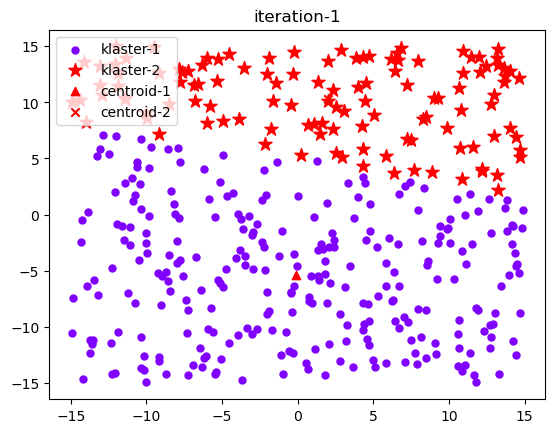

iterasi:  2
centroid:  [[ 0.136268   -6.5034964 ]
 [ 1.20334459  9.0611973 ]]


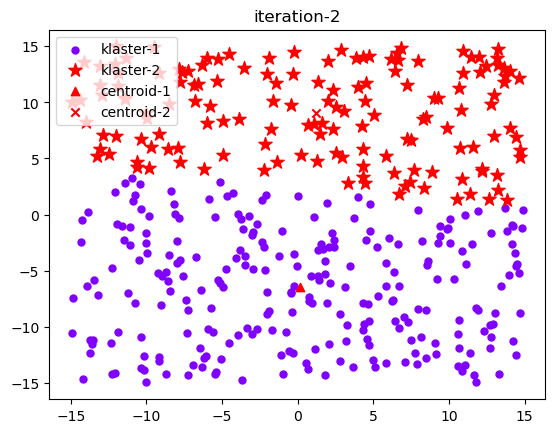

iterasi:  3
centroid:  [[ 0.24754034 -6.92840042]
 [ 0.95779625  8.52589   ]]


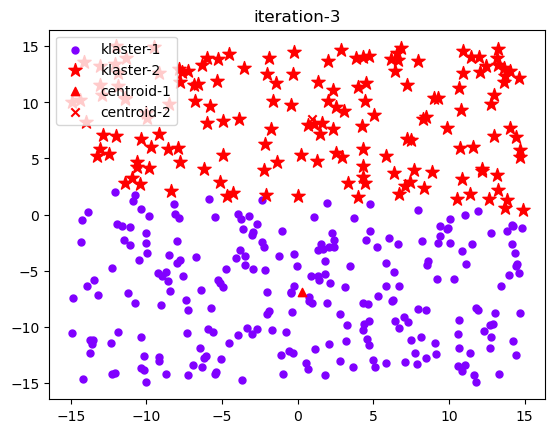

iterasi:  4
centroid:  [[ 0.30895584 -7.17575325]
 [ 0.84307305  8.2202521 ]]


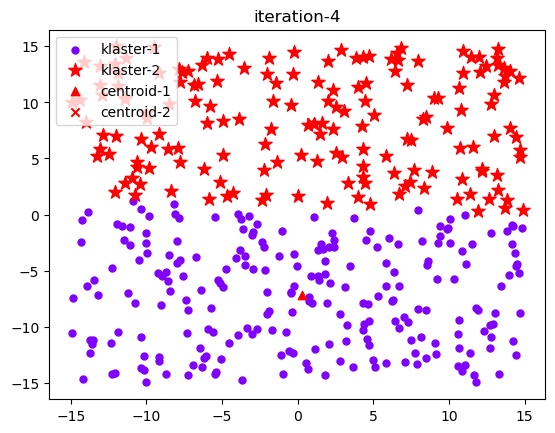

iterasi:  5
centroid:  [[ 0.36159605 -7.28137895]
 [ 0.76304765  8.09022059]]


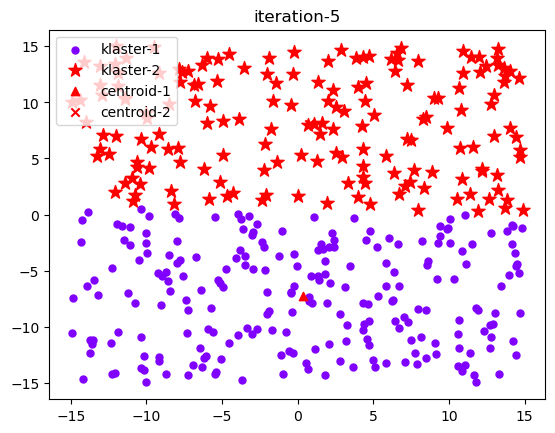

iterasi:  6
centroid:  [[ 0.36159605 -7.28137895]
 [ 0.76304765  8.09022059]]


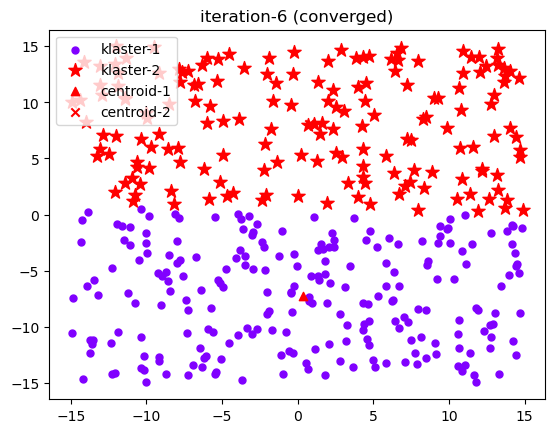

In [5]:
#Panggil fungsi inisialisasi klaster
centroidInit = initCentroid(input, k)

#Panggil fungsi k-means
clusterResults, centroid = kMeans(input, centroidInit)

#Plot hasil final klaster setelah konvergen
plotClusterResult(clusterResults, centroid, str(iterationCounter) + " (converged)", 1)